### <h1 align="center"> Assignment 11 </h1>
<h3 align="center"> IST 5520: Data Methodologies in Python </h3>
<h3 align="center"> By: SHALINI RALLAPALLI VENKATA </h3>

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import metrics

## 1.	Read in the dataset.

In [88]:
dat = pd.read_csv("C:/Users/Shalini/Desktop/data methods python/ToyotaCorolla.csv")
dat.head(1000)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
5,12950,32,61000,Diesel,90,0,0,2000,3,1170
6,16900,27,94612,Diesel,90,1,0,2000,3,1245
7,18600,30,75889,Diesel,90,1,0,2000,3,1245
8,21500,27,19700,Petrol,192,0,0,1800,3,1185
9,12950,23,71138,Diesel,69,0,0,1900,3,1105


- Price – offer price in EUROs 
- Age – age months as in August 2004
- KM – accumulated kilometers on odometer
- FuelType – fuel type (petrol, diesel, CNG - compressed natural gas)
- HP – horse power
- MetColor – metallic color? (Yes =1, No = 0)
- Automatic – automatic (Yes = 1, No = 0)
- CC – cylinder volume in cubic centimeters
- Doors – number of doors
- Weight – weight in kilograms


In [60]:
# Fit a full model
mod_full = sm.OLS(y,X).fit()

# Summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     948.0
Date:                Sun, 15 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:55:26   Log-Likelihood:                -12346.
No. Observations:                1436   AIC:                         2.471e+04
Df Residuals:                    1425   BIC:                         2.477e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3801.3614   1304.082     -2.915      0.004   -6359.487   -1243.236
FuelType[T.Diesel]  3390.0766    518.795      6.535      0.000    2372.392    4407.761
FuelType[T.Petrol]  1120.6764    332.365      3.372      0.001     468.699    1772.654
Age                 -122.0145      2.602    -46.889      0.000    -127.119    -116.910
KM                    -0.0162      0.001    -12.347      0.000      -0.019      -0.014
HP                    60.8133      5.756     10.565      0.000      49.522      72.104
MetColor              57.1598     74.939      0.763      0.446     -89.843     204.162
Automatic            330.2509    157.096      2.102      0.036      22.087     638.414
CC                    -4.1744      0.545     -7.656      0.000      -5.244      -3.105
Doors                 -7.7763     40.064     -0.194      0.846     -86.368      70.815
Weight                20.0094      1.203     16.629      0.000      17.649      22.370
==============================================================================
Omnibus:                      275.198   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2826.189
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       9.776   Cond. No.                     2.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2.	Create design matrices to represent X and y.

In [3]:
y, X = dmatrices('Price ~ Age + KM + FuelType + HP + MetColor + Automatic + CC + Doors + Weight',
                 data=dat,
                 return_type='dataframe')

In [19]:
y.head()

,Price
0,13500.0
1,13750.0
2,13950.0
3,14950.0
4,13750.0


In [4]:
X.head()

,Intercept,FuelType[T.Diesel],FuelType[T.Petrol],Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,1.0,1.0,0.0,23.0,46986.0,90.0,1.0,0.0,2000.0,3.0,1165.0
1,1.0,1.0,0.0,23.0,72937.0,90.0,1.0,0.0,2000.0,3.0,1165.0
2,1.0,1.0,0.0,24.0,41711.0,90.0,1.0,0.0,2000.0,3.0,1165.0
3,1.0,1.0,0.0,26.0,48000.0,90.0,0.0,0.0,2000.0,3.0,1165.0
4,1.0,1.0,0.0,30.0,38500.0,90.0,0.0,0.0,2000.0,3.0,1170.0


In [5]:
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
MetColor,1436.0,0.674791,0.468616,0.0,0.0,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
CC,1436.0,1566.827994,187.182436,1300.0,1400.0,1600.0,1600.00,2000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [6]:
pd.crosstab(index=dat['Price'],columns="count")

col_0,count
Price,
4350,1
4400,1
4450,1
4750,1
5150,1
5250,2
5600,1
5740,1
5750,2


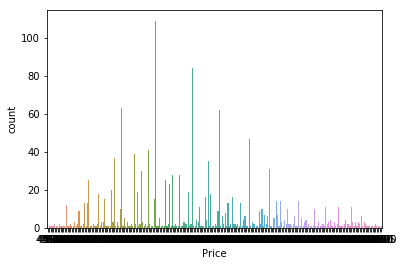

In [23]:
sns.countplot(x="Price", data=dat)

In [8]:
# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = model_selection.train_test_split(y, X,
                                                                 test_size=0.2,
                                                                 random_state=123)

In [9]:
train_X.shape

(1148, 11)

In [10]:
test_X.shape

(288, 11)

In [11]:
train_y.describe()

,Price
count,1148.000000
mean,10718.589721
std,3584.692056
min,4350.000000
25%,8450.000000
50%,9900.000000
75%,11935.000000
max,32500.000000


In [12]:
test_y.describe()

,Price
count,288.000000
mean,10779.593750
std,3796.851332
min,5740.000000
25%,8450.000000
50%,9750.000000
75%,11950.000000
max,31000.000000


In [118]:
# Use scikit-learn to conduct linear regression
from sklearn.linear_model import LinearRegression
mod_sk = LinearRegression(fit_intercept=False).fit(X,y)

In [103]:
# Print coefficient
print(mod_sk.coef_)

[[-3.80136143e+03  3.39007655e+03  1.12067637e+03 -1.22014486e+02
  -1.62083195e-02  6.08132813e+01  5.71597722e+01  3.30250940e+02
  -4.17437213e+00 -7.77626835e+00  2.00093566e+01]]


In [127]:
pd.DataFrame({'Predictor':X.columns,'Coefficient':mod_sk.coef_[0]})

,Coefficient,Predictor
0,-3801.361426,Intercept
1,3390.076553,FuelType[T.Diesel]
2,1120.676375,FuelType[T.Petrol]
3,-122.014486,Age
4,-0.016208,KM
5,60.813281,HP
6,57.159772,MetColor
7,330.250940,Automatic
8,-4.174372,CC
9,-7.776268,Doors


In [128]:
X_b = X[['Age']]
X_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 1 columns):
Age    1436 non-null float64
dtypes: float64(1)
memory usage: 22.4 KB


In [174]:
# Use the sklean.utils.resample to implement the bootstrap procedure
from sklearn.utils import resample

In [185]:
# Set the number of bootstraps
n_bootstraps = 1000
bootstrap_ols = []

# Set the random number seed
np.random.seed(123)

# Resample the test dataset, and calculate performance metric
for i in range(1000):
        
    # Get a bootstrap of test dataset
    resample_test_X, resample_test_y = resample(X, y, replace = True)
    mod_full_boot = sm.OLS(resample_test_y,resample_test_X).fit()
    print(mod_full_boot)
    bootstrap_ols=pd.Series(mod_full_boot.params[['Age']])
    print(bootstrap_ols[['Age']])

Age   -111.20024
dtype: float64
Age   -122.024756
dtype: float64
Age   -136.776573
dtype: float64
Age   -109.091333
dtype: float64
Age   -123.595572
dtype: float64
Age   -116.858949
dtype: float64
Age   -114.193692
dtype: float64
Age   -107.661081
dtype: float64
Age   -117.445666
dtype: float64
Age   -117.57865
dtype: float64
Age   -111.874357
dtype: float64
Age   -115.99397
dtype: float64
Age   -118.143071
dtype: float64
Age   -115.652189
dtype: float64
Age   -121.062948
dtype: float64
Age   -121.757006
dtype: float64
Age   -127.870544
dtype: float64
Age   -116.291602
dtype: float64
Age   -116.862246
dtype: float64
Age   -112.120152
dtype: float64
Age   -128.848502
dtype: float64
Age   -116.761914
dtype: float64
Age   -119.820467
dtype: float64
Age   -114.392178
dtype: float64
Age   -117.468684
dtype: float64
Age   -110.077992
dtype: float64
Age   -120.657936
dtype: float64
Age   -129.019213
dtype: float64
Age   -113.533489
dtype: float64
Age   -124.081607
dtype: float64
Age   -126.18

Age   -121.274535
dtype: float64
Age   -118.442176
dtype: float64
Age   -118.080169
dtype: float64
Age   -119.400739
dtype: float64
Age   -127.753904
dtype: float64
Age   -123.647886
dtype: float64
Age   -127.930414
dtype: float64
Age   -116.862078
dtype: float64
Age   -124.171025
dtype: float64
Age   -120.263507
dtype: float64
Age   -126.647815
dtype: float64
Age   -117.398303
dtype: float64
Age   -120.214735
dtype: float64
Age   -122.462556
dtype: float64
Age   -114.910872
dtype: float64
Age   -130.456141
dtype: float64
Age   -122.594421
dtype: float64
Age   -124.819146
dtype: float64
Age   -124.087946
dtype: float64
Age   -125.281725
dtype: float64
Age   -117.70971
dtype: float64
Age   -115.151462
dtype: float64
Age   -129.947404
dtype: float64
Age   -122.066382
dtype: float64
Age   -115.573501
dtype: float64
Age   -117.749849
dtype: float64
Age   -124.757686
dtype: float64
Age   -125.640093
dtype: float64
Age   -117.633369
dtype: float64
Age   -127.145099
dtype: float64
Age   -126.

Age   -121.47898
dtype: float64
Age   -119.2087
dtype: float64
Age   -124.958715
dtype: float64
Age   -123.898294
dtype: float64
Age   -120.22574
dtype: float64
Age   -122.574623
dtype: float64
Age   -121.455826
dtype: float64
Age   -117.112389
dtype: float64
Age   -116.923281
dtype: float64
Age   -129.382966
dtype: float64
Age   -112.430598
dtype: float64
Age   -126.611767
dtype: float64
Age   -124.247739
dtype: float64
Age   -124.85746
dtype: float64
Age   -125.203693
dtype: float64
Age   -117.908599
dtype: float64
Age   -124.650282
dtype: float64
Age   -110.711467
dtype: float64
Age   -122.349225
dtype: float64
Age   -125.109125
dtype: float64
Age   -124.339445
dtype: float64
Age   -128.505198
dtype: float64
Age   -112.368302
dtype: float64
Age   -127.701929
dtype: float64
Age   -122.8564
dtype: float64
Age   -122.001156
dtype: float64
Age   -121.301553
dtype: float64
Age   -112.704649
dtype: float64
Age   -110.995497
dtype: float64
Age   -115.116178
dtype: float64
Age   -126.748887

Age   -118.318827
dtype: float64
Age   -129.224183
dtype: float64
Age   -119.472196
dtype: float64
Age   -123.618457
dtype: float64
Age   -111.729668
dtype: float64
Age   -128.548447
dtype: float64
Age   -112.169973
dtype: float64
Age   -114.461056
dtype: float64
Age   -127.097682
dtype: float64
Age   -116.66639
dtype: float64
Age   -119.946356
dtype: float64
Age   -125.964216
dtype: float64
Age   -129.666374
dtype: float64
Age   -125.93355
dtype: float64
Age   -107.421058
dtype: float64
Age   -108.986063
dtype: float64
Age   -116.35971
dtype: float64
Age   -117.026066
dtype: float64
Age   -118.853347
dtype: float64
Age   -123.48356
dtype: float64
Age   -119.518888
dtype: float64
Age   -125.677516
dtype: float64
Age   -127.04047
dtype: float64
Age   -122.016456
dtype: float64
Age   -116.792233
dtype: float64
Age   -128.272491
dtype: float64
Age   -129.32541
dtype: float64
Age   -114.87224
dtype: float64
Age   -116.059302
dtype: float64
Age   -120.4042
dtype: float64
Age   -119.014597
d

Age   -116.347753
dtype: float64
Age   -119.812103
dtype: float64
Age   -113.947269
dtype: float64
Age   -124.49511
dtype: float64
Age   -119.284894
dtype: float64
Age   -117.094834
dtype: float64
Age   -118.071663
dtype: float64
Age   -117.105268
dtype: float64
Age   -131.29839
dtype: float64
Age   -125.304033
dtype: float64
Age   -118.937656
dtype: float64
Age   -125.600395
dtype: float64
Age   -118.619368
dtype: float64
Age   -119.591444
dtype: float64
Age   -110.548358
dtype: float64
Age   -125.298202
dtype: float64
Age   -117.993438
dtype: float64
Age   -113.961187
dtype: float64
Age   -127.105723
dtype: float64
Age   -123.384231
dtype: float64
Age   -115.26495
dtype: float64
Age   -116.608346
dtype: float64
Age   -119.192413
dtype: float64
Age   -125.011818
dtype: float64
Age   -124.35994
dtype: float64
Age   -112.54046
dtype: float64
Age   -120.330807
dtype: float64
Age   -129.098891
dtype: float64
Age   -116.456878
dtype: float64
Age   -123.314824
dtype: float64
Age   -124.5410

Age   -121.470639
dtype: float64
Age   -109.891443
dtype: float64
Age   -120.58455
dtype: float64
Age   -112.393973
dtype: float64
Age   -116.038659
dtype: float64
Age   -131.861932
dtype: float64
Age   -107.72985
dtype: float64
Age   -125.483009
dtype: float64
Age   -122.614583
dtype: float64
Age   -118.161139
dtype: float64
Age   -122.906766
dtype: float64
Age   -127.819729
dtype: float64
Age   -127.502643
dtype: float64
Age   -122.356805
dtype: float64
Age   -119.07493
dtype: float64
Age   -129.697834
dtype: float64
Age   -111.608064
dtype: float64
Age   -118.685164
dtype: float64
Age   -127.730508
dtype: float64
Age   -122.484011
dtype: float64
Age   -115.365037
dtype: float64
Age   -127.51278
dtype: float64
Age   -123.948292
dtype: float64
Age   -124.664293
dtype: float64
Age   -126.719013
dtype: float64
Age   -122.518093
dtype: float64
Age   -119.788834
dtype: float64
Age   -105.647567
dtype: float64
Age   -118.549638
dtype: float64
Age   -120.461635
dtype: float64
Age   -125.379

Age   -111.281143
dtype: float64
Age   -120.006446
dtype: float64
Age   -121.56906
dtype: float64
Age   -124.554089
dtype: float64
Age   -120.016265
dtype: float64
Age   -125.538171
dtype: float64
Age   -109.443488
dtype: float64
Age   -120.366827
dtype: float64
Age   -119.775222
dtype: float64
Age   -114.761556
dtype: float64
Age   -124.531379
dtype: float64
Age   -126.449348
dtype: float64
Age   -118.391387
dtype: float64
Age   -124.645608
dtype: float64
Age   -128.15902
dtype: float64
Age   -121.665316
dtype: float64
Age   -125.876189
dtype: float64
Age   -123.340348
dtype: float64
Age   -122.408231
dtype: float64
Age   -122.874077
dtype: float64
Age   -128.792766
dtype: float64
Age   -123.00202
dtype: float64
Age   -120.183482
dtype: float64
Age   -116.047516
dtype: float64
Age   -122.135669
dtype: float64
Age   -110.994387
dtype: float64
Age   -116.069338
dtype: float64
Age   -122.366145
dtype: float64
Age   -120.266552
dtype: float64
Age   -118.573945
dtype: float64
Age   -123.73

Age   -124.753671
dtype: float64
Age   -128.498457
dtype: float64
Age   -124.113704
dtype: float64
Age   -129.442091
dtype: float64
Age   -118.420575
dtype: float64
Age   -118.651339
dtype: float64
Age   -122.658548
dtype: float64
Age   -122.545283
dtype: float64
Age   -119.091567
dtype: float64
Age   -119.774978
dtype: float64
Age   -107.182172
dtype: float64
Age   -120.952967
dtype: float64
Age   -121.34459
dtype: float64
Age   -119.697226
dtype: float64
Age   -124.896377
dtype: float64
Age   -125.253096
dtype: float64
Age   -126.784832
dtype: float64
Age   -129.074691
dtype: float64
Age   -121.768117
dtype: float64
Age   -111.905421
dtype: float64
Age   -115.77037
dtype: float64
Age   -122.806976
dtype: float64
Age   -118.305258
dtype: float64
Age   -130.364413
dtype: float64
Age   -121.626979
dtype: float64
Age   -119.227912
dtype: float64
Age   -124.302069
dtype: float64
Age   -129.93887
dtype: float64
Age   -109.782646
dtype: float64
Age   -126.827725
dtype: float64
Age   -119.76

Age   -128.117586
dtype: float64
Age   -104.624351
dtype: float64
Age   -115.799339
dtype: float64
Age   -128.026669
dtype: float64
Age   -125.167771
dtype: float64
Age   -123.328969
dtype: float64
Age   -116.508245
dtype: float64
Age   -126.0999
dtype: float64
Age   -108.475386
dtype: float64
Age   -105.310724
dtype: float64
Age   -112.57386
dtype: float64
Age   -108.017892
dtype: float64
Age   -123.83809
dtype: float64
Age   -121.804981
dtype: float64
Age   -111.814738
dtype: float64
Age   -121.325049
dtype: float64
Age   -125.348693
dtype: float64
Age   -121.812693
dtype: float64
Age   -128.076208
dtype: float64
Age   -115.769308
dtype: float64
Age   -120.690807
dtype: float64
Age   -121.263817
dtype: float64
Age   -120.729265
dtype: float64
Age   -117.960791
dtype: float64
Age   -129.590227
dtype: float64
Age   -120.013375
dtype: float64
Age   -122.203329
dtype: float64
Age   -120.073286
dtype: float64
Age   -123.165894
dtype: float64
Age   -123.887085
dtype: float64
Age   -113.235

Age   -124.725426
dtype: float64
Age   -116.295098
dtype: float64
Age   -127.131828
dtype: float64
Age   -123.510056
dtype: float64
Age   -122.614115
dtype: float64
Age   -116.395064
dtype: float64
Age   -123.849805
dtype: float64
Age   -117.27309
dtype: float64
Age   -123.683748
dtype: float64
Age   -120.774719
dtype: float64
Age   -110.606834
dtype: float64
Age   -127.136958
dtype: float64
Age   -121.199047
dtype: float64
Age   -107.627598
dtype: float64
Age   -121.780869
dtype: float64
Age   -128.753711
dtype: float64
Age   -105.897747
dtype: float64
Age   -121.938579
dtype: float64
Age   -120.420112
dtype: float64
Age   -119.806338
dtype: float64
Age   -118.49288
dtype: float64
Age   -112.097774
dtype: float64
Age   -120.643869
dtype: float64
Age   -113.691679
dtype: float64
Age   -117.855889
dtype: float64
Age   -120.316456
dtype: float64
Age   -121.973906
dtype: float64
Age   -117.325763
dtype: float64
Age   -121.84555
dtype: float64
Age   -121.263456
dtype: float64
Age   -130.51

Age   -117.621143
dtype: float64
Age   -109.094338
dtype: float64
Age   -119.128863
dtype: float64
Age   -121.478195
dtype: float64
Age   -123.110574
dtype: float64
Age   -123.818289
dtype: float64
Age   -125.62955
dtype: float64
Age   -108.576056
dtype: float64
Age   -114.824755
dtype: float64
Age   -120.964053
dtype: float64
Age   -109.340227
dtype: float64
Age   -116.652779
dtype: float64
Age   -117.171954
dtype: float64
Age   -125.789099
dtype: float64
Age   -123.278991
dtype: float64
Age   -123.920569
dtype: float64
Age   -126.699923
dtype: float64
Age   -121.833311
dtype: float64
Age   -125.201638
dtype: float64
Age   -118.489104
dtype: float64
Age   -123.681609
dtype: float64
Age   -124.856221
dtype: float64
Age   -128.201856
dtype: float64
Age   -122.459978
dtype: float64
Age   -118.530623
dtype: float64
Age   -122.528992
dtype: float64
Age   -117.200277
dtype: float64
Age   -119.199626
dtype: float64
Age   -118.428836
dtype: float64
Age   -119.988557
dtype: float64
Age   -127.

Age   -115.033567
dtype: float64
Age   -120.618391
dtype: float64
Age   -112.407384
dtype: float64
Age   -119.964222
dtype: float64
Age   -118.194491
dtype: float64
Age   -111.764782
dtype: float64
Age   -116.791958
dtype: float64
Age   -126.109592
dtype: float64
Age   -130.821208
dtype: float64
Age   -124.124523
dtype: float64
Age   -126.403866
dtype: float64
Age   -122.664983
dtype: float64
Age   -124.111929
dtype: float64
Age   -119.613479
dtype: float64
Age   -124.015777
dtype: float64
Age   -125.391066
dtype: float64
Age   -121.141008
dtype: float64
Age   -122.841833
dtype: float64
Age   -123.636488
dtype: float64
Age   -126.142698
dtype: float64
Age   -120.459922
dtype: float64
Age   -119.72442
dtype: float64
Age   -135.657408
dtype: float64
Age   -121.313076
dtype: float64
Age   -126.252332
dtype: float64
Age   -108.224973
dtype: float64
Age   -133.996215
dtype: float64
Age   -115.494964
dtype: float64
Age   -123.174636
dtype: float64
Age   -119.903486
dtype: float64
Age   -113.

Age   -115.569681
dtype: float64
Age   -120.223752
dtype: float64
Age   -117.417462
dtype: float64
Age   -121.990118
dtype: float64
Age   -109.428022
dtype: float64
Age   -111.329778
dtype: float64
Age   -123.494525
dtype: float64
Age   -120.501109
dtype: float64
Age   -117.714821
dtype: float64
Age   -113.599331
dtype: float64
Age   -122.366179
dtype: float64
Age   -116.912347
dtype: float64
Age   -124.104706
dtype: float64
Age   -116.476671
dtype: float64
Age   -116.612733
dtype: float64
Age   -134.080477
dtype: float64
Age   -124.712304
dtype: float64
Age   -117.012293
dtype: float64
Age   -119.24287
dtype: float64
Age   -115.283848
dtype: float64
Age   -118.953594
dtype: float64
Age   -123.593398
dtype: float64
Age   -120.554139
dtype: float64
Age   -109.6784
dtype: float64
Age   -127.611357
dtype: float64
Age   -116.105334
dtype: float64
Age   -130.762335
dtype: float64
Age   -130.404849
dtype: float64
Age   -120.851529
dtype: float64
Age   -121.47646
dtype: float64
Age   -117.546

dtype: float64
Age   -114.889787
dtype: float64
Age   -128.520227
dtype: float64
Age   -121.949177
dtype: float64
Age   -121.717342
dtype: float64
Age   -119.084279
dtype: float64
Age   -123.526497
dtype: float64
Age   -114.93835
dtype: float64
Age   -123.775182
dtype: float64
Age   -122.293209
dtype: float64
Age   -122.432875
dtype: float64
Age   -118.491475
dtype: float64
Age   -112.207379
dtype: float64


In [192]:
n_bootstraps = 1000
bootstrap_ols = []

# Set the random number seed
np.random.seed(123)

# Resample the test dataset, and calculate performance metric
for i in range(1000):
        
    # Get a bootstrap of test dataset
    resample_test_X, resample_test_y = resample(X, y, replace = True)
    mod_full_boot = sm.OLS(resample_test_y,resample_test_X).fit()
    bootstrap_ols=pd.Series(mod_full_boot.params[['Age']])
# 95% confidence interval of mean F1 for logit
print("(", 
      np.percentile(bootstrap_ols, 2.5),
     ", ",
     np.percentile(bootstrap_ols, 97.5),
     ")")

( -112.20737903394561 ,  -112.20737903394561 )


95% confidence interval is 112.207

The 95% confidence interval does not contain zero, we do have evidence to support the hypothesis 1. 

We have different conclusions by OLS and bootstarp method. OLS has -122 negative effect and bootstrap has 112 negative effect.